In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scikit_posthocs as sp

from py_utilities.__init__ import format_yticks, print_corr_matrix, shapiro_wilk_and_bartlett_tests

df_folder = 'data/clean_data'

ab_test_df = pd.read_pickle(f"{df_folder}/ab_test_df.pkl")

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


Invoking __init__.py for py_utilities
Invoking __init__.py for py_utilities.__init__


In [2]:
ab_test_df['word_count'] = ab_test_df['review_content'].apply(lambda x: len(nltk.word_tokenize(x)))
ab_test_df['char_count'] = ab_test_df['review_content'].apply(len)
ab_test_df['avg_word_length'] = ab_test_df.apply(lambda row: row['char_count'] / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

In [3]:
ab_test_df

,podcast_title,review_title,review_content,author_id,review_created_at,avg_review_rating,effective_avg_rating,word_count,char_count,avg_word_length
0,Drink 'til We're Funny!,my favorite queer podcast,I've spent a lot of time searching for enterta...,B2DF6EF08E9D7A1,2005-12-09T21:41:01-07:00,5.0,4.772727,86,450,5.232558
1,Democracy Now! Audio,Jackpot!!!,Suddenly having on-demand access to the entire...,220D52F1492D8B4,2005-12-09T23:39:45-07:00,5.0,4.439024,59,337,5.711864
2,Distorted View Daily,Awesomely funny and unique podcast,This is a well done and very enjoyable podcast...,65655C518D2D0CC,2005-12-10T09:19:30-07:00,5.0,4.785536,48,200,4.166667
3,Insight for Living Daily Broadcast,Strong messages,Chuck Swindoll's Insight for Living. Has alway...,F7EC34F784D62EE,2005-12-10T11:06:38-07:00,5.0,4.664634,124,552,4.451613
4,Eat This Hot Show,Eat This Hot Review,5 Stars for you! One Of The Best On itunes.,BC3DD2C1DE0AEE3,2005-12-10T15:10:25-07:00,5.0,4.468750,12,43,3.583333
...,...,...,...,...,...,...,...,...,...,...
2042644,For the Love of Freelance,I will be binging!,Just found this podcast and I already plan to ...,EE7877B6C336602,2023-02-16T08:15:52-07:00,5.0,5.000000,46,231,5.021739
2042645,Ruthless,One Driver at a Time!!,You guys nailed it again! Hilarious episode to...,D7377DCBB0E3A68,2023-02-16T08:24:59-07:00,5.0,4.666181,67,317,4.731343
2042646,True Crime with Kendall Rae,Another Anti-Police host,This one actually says…”it was as if the polic...,096A4B476F3C011,2023-02-16T08:38:37-07:00,1.0,4.136531,109,480,4.403670
2042647,The Joe Rogan Experience,NEWS RADIO FAN 4 life,"Joe is my source for Honest, Hard Hitting Com...",3BBAB440E06A8CB,٢٠٢٠-١٢-٢٤T٠٨:٢٦:٣٦-07:00,5.0,3.737408,18,86,4.777778


/tmp/ipykernel_10311/469685314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_test_df['sentiment'] = ab_test_df['review_content'].apply(lambda x: sia.polarity_scores(x)['compound'])
/home/alessio-pc/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alessio-pc/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


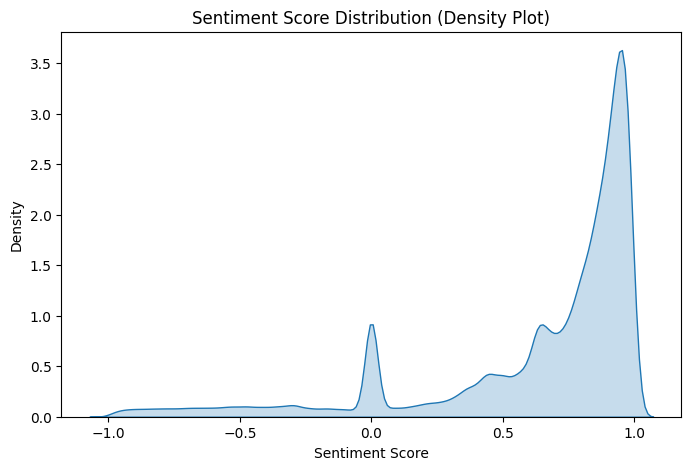

In [4]:
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each response higher than 2 chars
ab_test_df = ab_test_df[ab_test_df['word_count'] >= 2]
ab_test_df['sentiment'] = ab_test_df['review_content'].apply(lambda x: sia.polarity_scores(x)['compound'])


plt.figure(figsize=(8, 5))
sns.kdeplot(data=ab_test_df['sentiment'], fill=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Sentiment Score Distribution (Density Plot)')
plt.show()


/tmp/ipykernel_10311/1247502994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_test_df['sentiment_category'] = ab_test_df['sentiment'].apply(lambda x: 'Positive' if x > threshold else ('Negative' if x < -threshold else 'Neutral'))
/home/alessio-pc/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alessio-pc/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_

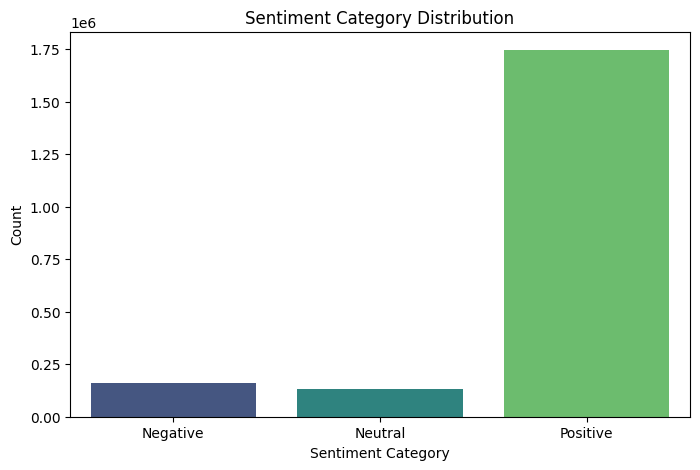

In [5]:
# Define a threshold for categorizing sentiment scores
threshold = 0.1
ab_test_df['sentiment_category'] = ab_test_df['sentiment'].apply(lambda x: 'Positive' if x > threshold else ('Negative' if x < -threshold else 'Neutral'))

plt.figure(figsize=(8, 5))
sns.countplot(data=ab_test_df, x='sentiment_category', order=['Negative', 'Neutral', 'Positive'], palette='viridis')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Category Distribution')
plt.show()


In [6]:
mask_p = ab_test_df['sentiment_category'] == 'Positive'
mask_n = ab_test_df['sentiment_category'] == 'Negative'
mask_neu = ab_test_df['sentiment_category'] == 'Neutral'
print('Reviews with positive sentiment:', ab_test_df[mask_p].shape[0])
print('Reviews with negative sentiment:', ab_test_df[mask_n].shape[0])
print('Reviews with neutral sentiment:', ab_test_df[mask_neu].shape[0])

Reviews with positive sentiment: 1745826
Reviews with negative sentiment: 161625
Reviews with neutral sentiment: 132866


Obviously, the vast majority of sentiments expressed in the review contents is positive.

Before starting with our AB test on the groups, we need to check whether they are normally distributed and/or follow homoschedasticity principles.

/home/alessio-pc/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test Results:
Group: Positive, Shapiro Statistic: 0.8534396886825562, p-value: 0.0
Group: Negative, Shapiro Statistic: 0.9635410308837891, p-value: 0.0
Group: Neutral, Shapiro Statistic: 0.5720052719116211, p-value: 0.0

Bartlett Test Results:
Group: sentiment_category, Bartlett Statistic: 431994.1194237506, p-value: 0.0


({'Positive': {'Shapiro Statistic': 0.8534396886825562, 'p-value': 0.0},
  'Negative': {'Shapiro Statistic': 0.9635410308837891, 'p-value': 0.0},
  'Neutral': {'Shapiro Statistic': 0.5720052719116211, 'p-value': 0.0}},
 {'sentiment_category': {'Bartlett Statistic': 431994.1194237506,
   'p-value': 0.0}})

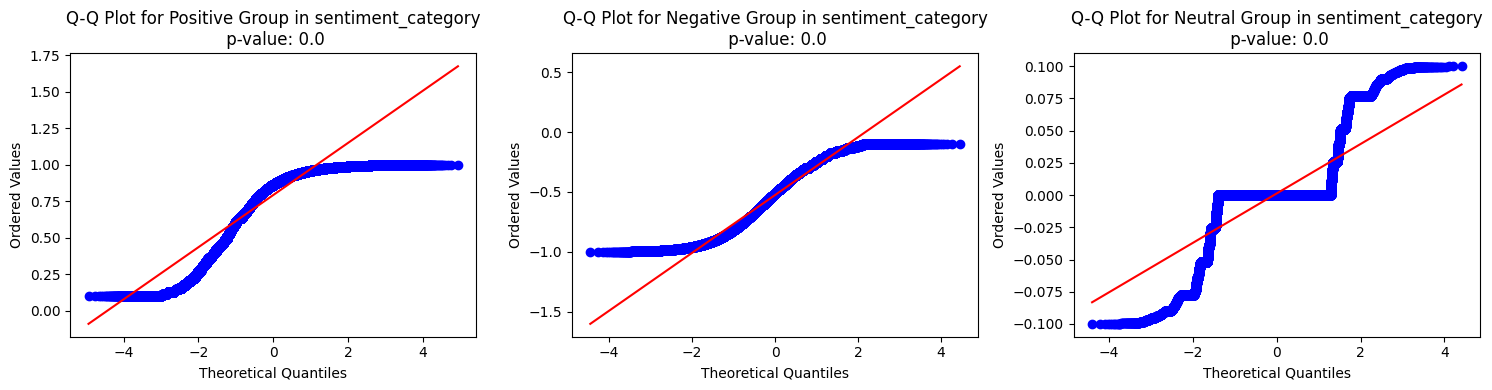

In [7]:
shapiro_wilk_and_bartlett_tests(ab_test_df, 'sentiment', 'sentiment_category')

Clearly marked by the Q-Q plot, and also visible from our tests, the data does not follow a normal distribution. We will thus have to resort to non-parametric tests, and for this dataset the choice will be Kruskal-Wallis test. We conduct a Kruskal-Wallis test to determine if there are statistically significant differences in the average ratings among the three sentiment groups (Positive, Negative, and Neutral). This test does not assume normality and is appropriate for non-normally distributed data such as this.

If the Kruskal-Wallis test indicates significant differences among the groups, we can proceed with post-hoc tests (e.g., Dunn's test) to identify which specific pairs of groups differ significantly.

In [9]:
ab_test_df.to_pickle(path=f"{df_folder}/ab_test_df.pkl")

positive_ratings = ab_test_df[ab_test_df['sentiment_category'] == 'Positive']['effective_avg_rating']
negative_ratings = ab_test_df[ab_test_df['sentiment_category'] == 'Negative']['effective_avg_rating']
neutral_ratings = ab_test_df[ab_test_df['sentiment_category'] == 'Neutral']['effective_avg_rating']

statistic, p_value = stats.kruskal(positive_ratings, negative_ratings, neutral_ratings)

print(f'Kruskal-Wallis Statistic: {statistic}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('The differences among groups are statistically significant.')
else:
    print('There is no significant difference among groups.')


Kruskal-Wallis Statistic: 100254.576324399
p-value: 0.0
The differences among groups are statistically significant.


As we can see, since the differences are statistically significant, we can proceed with post-hoc tests.

          Negative  Neutral  Positive
Negative       1.0      0.0       0.0
Neutral        0.0      1.0       0.0
Positive       0.0      0.0       1.0


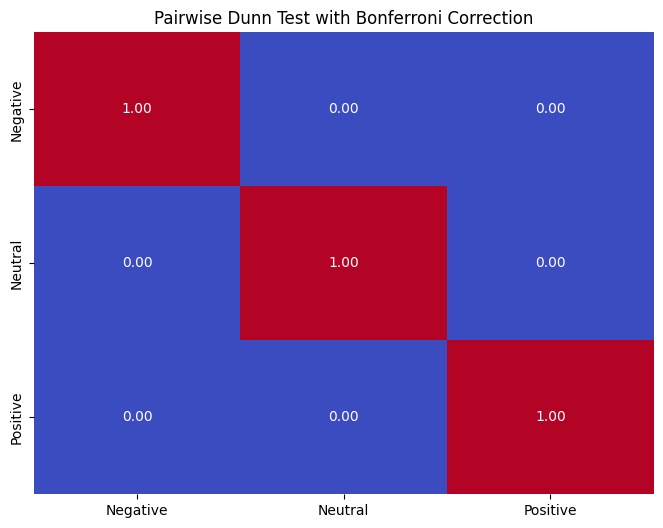

In [10]:
data_for_posthoc = pd.DataFrame({
    'group': ab_test_df['sentiment_category'],
    'value': ab_test_df['effective_avg_rating']
})

# Perform Dunn's test with Bonferroni correction
posthoc_results = sp.posthoc_dunn(data_for_posthoc, val_col='value', group_col='group', p_adjust='bonferroni')

# Print the post-hoc test results
print(posthoc_results)

# Create a heatmap to visualize the post-hoc results
plt.figure(figsize=(8, 6))
sns.heatmap(posthoc_results, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Pairwise Dunn Test with Bonferroni Correction')
plt.show()


This suggests that the post-hoc test with Bonferroni correction did not find any statistically significant pairwise differences between the Negative, Neutral, and Positive sentiment groups in terms of average ratings. However, it's essential to consider the nature of our data when interpreting these results. If you remember earlier, almost all of our reviews ratings are distributed around the 4.8 mark, therefore our results do make sense. 

This is also consistent with the distribution of sentiments we saw earlier, with the vast majority being positive ones.

/home/alessio-pc/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alessio-pc/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alessio-pc/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


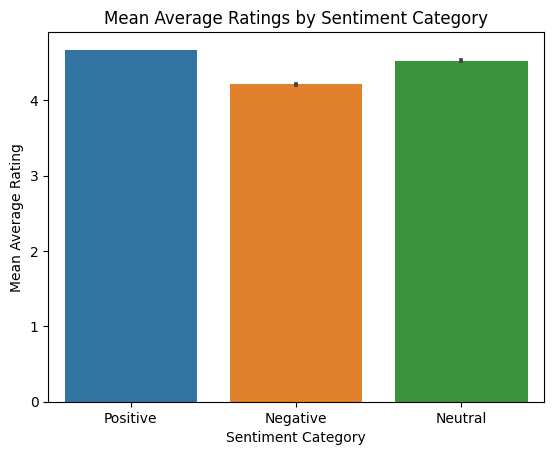

In [11]:
sns.barplot(x='sentiment_category', y='effective_avg_rating', data=ab_test_df, errorbar='ci')
plt.xlabel('Sentiment Category')
plt.ylabel('Mean Average Rating')
plt.title('Mean Average Ratings by Sentiment Category')
plt.show()


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

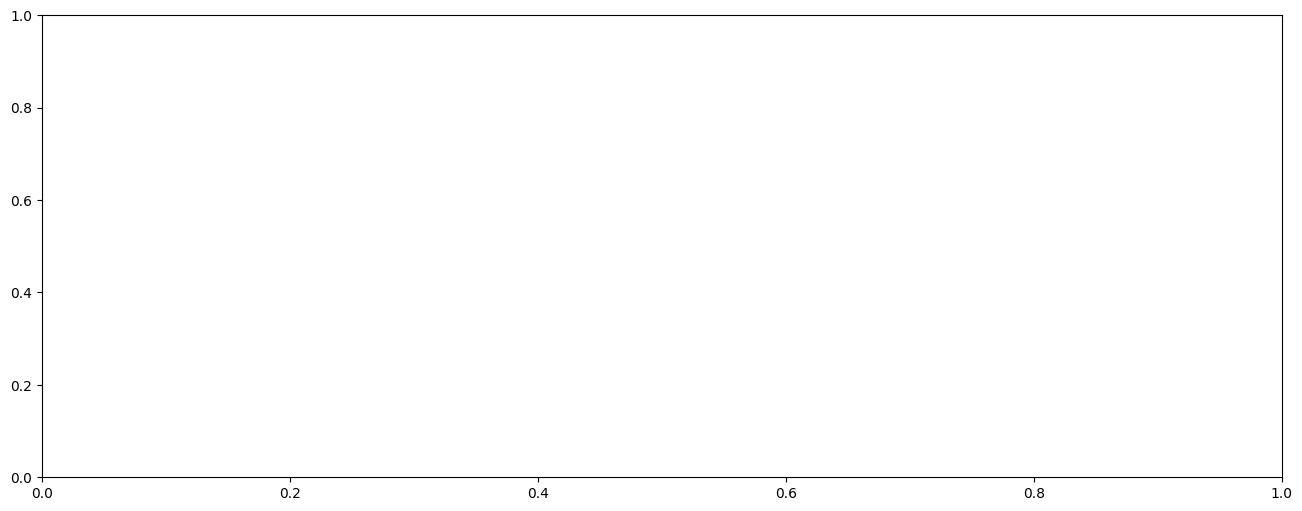

In [12]:
columns_to_test = ['sentiment']

kruskal_results = []

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_test), figsize=(16, 6))
colors = ['blue']

for i, column in enumerate(columns_to_test):
    filtered_data = ab_test_df.dropna()
    
    groups = filtered_data[column].unique()
    group_data = [filtered_data[filtered_data[column] == group]['sentiment_category'] for group in groups]
    
    if len(group_data) > 1:
        stat, p = scipy.stats.kruskal(*group_data)
        kruskal_results.append({'Column': column, 'Statistics': stat, 'p-value': p})
        
        # Create a grouped box plot with colored boxes
        ax = axes if len(columns_to_test) == 1 else axes[i]
        ax.boxplot(group_data, labels=groups, patch_artist=True, boxprops=dict(facecolor=colors[i]))
        ax.set_title(f"Kruskal-Wallis Test for {column}\n(p-value: {p:.4f})")

plt.tight_layout()
plt.show()

print('Results for Kruskal-Wallis test:\n')
for result in kruskal_results:
    print(f"Column: {result['Column']}, Statistics: {result['Statistics']}, p-value: {result['p-value']}")
